# Notebook to reorient text in an image

In [24]:
import cv2
import numpy as np
import imutils
import os
import shutil
from matplotlib import pyplot as plt
from scipy import ndimage


In [2]:
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 19
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
sample_images_path = os.path.join(os.path.dirname(os.path.realpath("__file__")), "../sample-images/")
cropped_dir_path = os.path.dirname(os.path.realpath("__file__")) + "/segments"

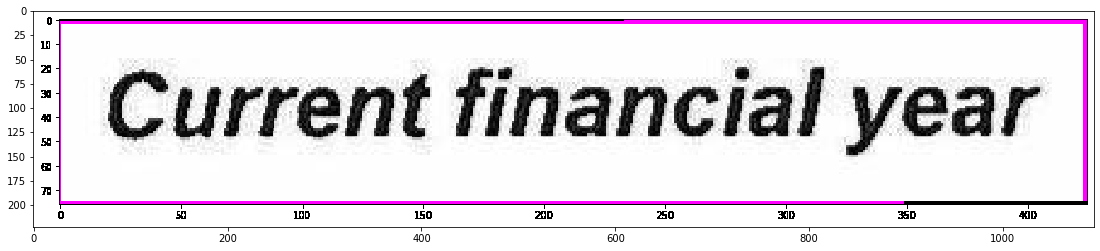

In [23]:
image = cv2.imread(cropped_dir_path+"/"+"rotated-1.png")
rotated_img = correct_image_orientation(image)
plt.imshow(rotated_img)

In [25]:
def correct_image_orientation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    cords = np.column_stack(np.where(thres> 0))
    angle = cv2.minAreaRect(cords)[-1]
    if angle < 0:
        angle = -(180 + angle)
    else:
        angle = -angle
    rotated = ndimage.rotate(image, angle)
    return rotated